In [1]:
import sklearn
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Support Vector Machines

#### Linear SVM

In [4]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, width
y = (iris["target"] == 2) # Iris-virginica

svm_cfl = Pipeline([ 
    ("scale", StandardScaler()), # important to scale features for SVM
    ("linear_svc", LinearSVC(C=1, loss="hinge")) # C sets how much soft margin to allow
])

svm_cfl.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

#### Nonlinear SVM

In [11]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X_moon, y_moon = make_moons(n_samples=100, noise=0.15, random_state=42)

poly_svm_clf = Pipeline([ 
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svwm_clf", LinearSVC(C=10, loss="hinge", random_state=42, max_iter=1500))
])

poly_svm_clf.fit(X_moon, y_moon)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svwm_clf',
                 LinearSVC(C=10, loss='hinge', max_iter=1500,
                           random_state=42))])

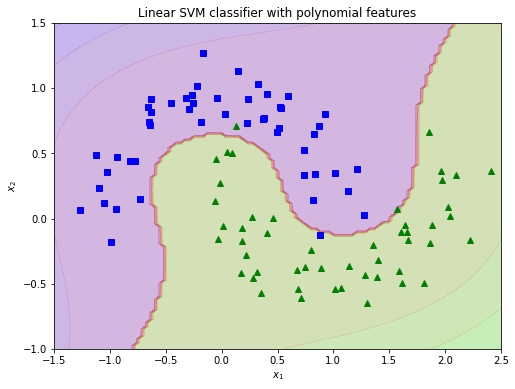

In [54]:
def plot_moon_data(X_moon, y_moon, ax=[]):
    if not ax:
        plt.figure(figsize=(8,6))
        plt.plot(X_moon[:,0][y_moon == 0], X_moon[:,1][y_moon == 0], "bs")
        plt.plot(X_moon[:,0][y_moon == 1], X_moon[:,1][y_moon == 1], "g^")
        plt.xlabel(r"$x_1$")
        plt.ylabel(r"$x_2$")
    else:
        ax.plot(X_moon[:,0][y_moon == 0], X_moon[:,1][y_moon == 0], "bs")
        ax.plot(X_moon[:,0][y_moon == 1], X_moon[:,1][y_moon == 1], "g^")
        ax.set_xlabel(r"$x_1$")
        ax.set_ylabel(r"$x_2$")

def plot_contours(classifier, x1_range, x2_range, ax=None):
    x1s = np.linspace(x1_range[0], x1_range[1], 100)
    x2s = np.linspace(x2_range[0], x2_range[1], 100)

    x1, x2 = np.meshgrid(x1s, x2s)
    X = np.c_[x1.ravel(), x2.ravel()]
    pred = classifier.predict(X).reshape(x1.shape)
    decision = classifier.decision_function(X).reshape(x1.shape)

    if not ax:
        plt.contourf(x1, x2, pred, cmap=plt.cm.brg, alpha=0.2)
        plt.contourf(x1, x2, decision, cmap=plt.cm.brg, alpha=0.1)
    else:
        ax.contourf(x1, x2, pred, cmap=plt.cm.brg, alpha=0.2)
        ax.contourf(x1, x2, decision, cmap=plt.cm.brg, alpha=0.1)

# plot the data and the 3rd degree SVM classifier
plot_moon_data(X_moon, y_moon)
plot_contours(poly_svm_clf, [-1.5, 2.5], [-1, 1.5])
plt.title("Linear SVM classifier with polynomial features")
plt.show()

### Polynomial Kernel

In [31]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([ 
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)) # trains faster
])

poly_kernel_svm_clf_10 = Pipeline([ 
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5)) # trains faster
])

poly_kernel_svm_clf.fit(X_moon, y_moon)
poly_kernel_svm_clf_10.fit(X_moon, y_moon)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

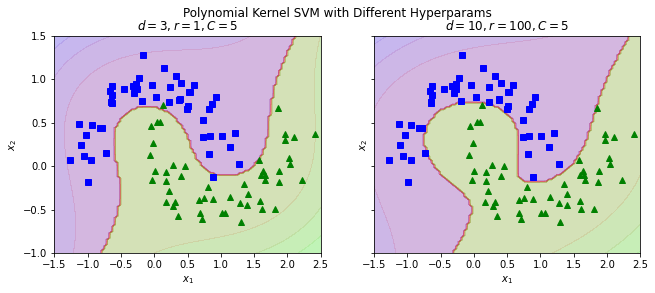

In [55]:
fig, ax = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

fig.suptitle("Polynomial Kernel SVM with Different Hyperparams")
plot_moon_data(X_moon, y_moon, ax=ax[0])
plot_contours(poly_kernel_svm_clf, [-1.5, 2.5], [-1, 1.5], ax=ax[0])
ax[0].set_title(r"$d=3, r=1, C=5$", fontsize=12)


plot_moon_data(X_moon, y_moon, ax=ax[1])
plot_contours(poly_kernel_svm_clf_10, [-1.5, 2.5], [-1, 1.5], ax=ax[1])
ax[1].set_title(r"$d=10, r=100, C=5$", fontsize=12)
plt.show()

### Gaussian RBF Kernel

Just like how SVM trick works with polynomial kernels, it can work with RBG kernel as well.

In [48]:
rbf_kernel_svm_clf_1 = Pipeline([ 
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=0.001))
])

rbf_kernel_svm_clf_2 = Pipeline([ 
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=1000))
])

rbf_kernel_svm_clf_3 = Pipeline([ 
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_kernel_svm_clf_4 = Pipeline([ 
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=1000))
])

for i in range(1, 5):
    eval(f"rbf_kernel_svm_clf_{i}.fit(X_moon, y_moon)")

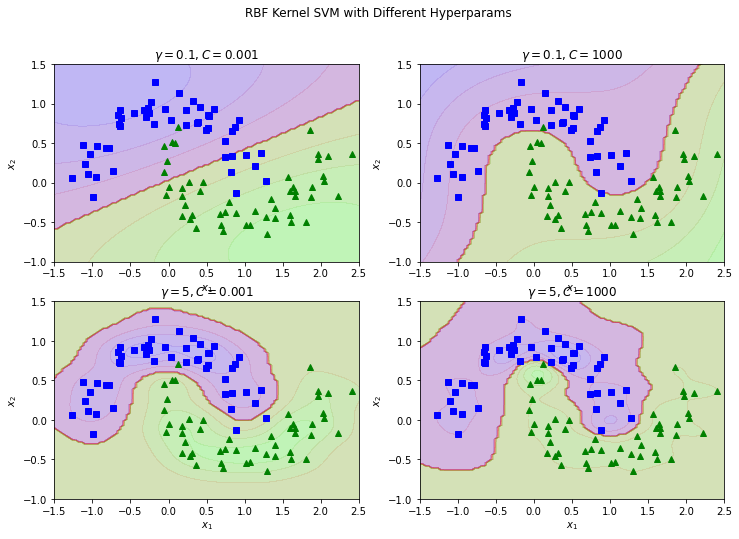

In [57]:
fig, ax = plt.subplots(2,2, figsize=(12,8))

fig.suptitle("RBF Kernel SVM with Different Hyperparams")

plot_moon_data(X_moon, y_moon, ax=ax[0,0])
plot_contours(rbf_kernel_svm_clf_1, [-1.5, 2.5], [-1, 1.5], ax[0,0])
ax[0,0].set_title(r"$\gamma=0.1, C=0.001$", fontsize=12)

plot_moon_data(X_moon, y_moon, ax=ax[0,1])
plot_contours(rbf_kernel_svm_clf_2, [-1.5, 2.5], [-1, 1.5], ax=ax[0,1])
ax[0,1].set_title(r"$\gamma=0.1, C=1000$", fontsize=12)

plot_moon_data(X_moon, y_moon, ax=ax[1,0])
plot_contours(rbf_kernel_svm_clf_3, [-1.5, 2.5], [-1, 1.5], ax=ax[1,0])
ax[1,0].set_title(r"$\gamma=5, C=0.001$", fontsize=12)

plot_moon_data(X_moon, y_moon, ax=ax[1,1])
plot_contours(rbf_kernel_svm_clf_4, [-1.5, 2.5], [-1, 1.5], ax=ax[1,1])
ax[1,1].set_title(r"$\gamma=5, C=1000$", fontsize=12)

plt.show()

### SVM Regression

Instead of like SVM Classification, where the objective is to find the widest possible "street" between two classes, SVM aims to fit as many samples ON the street.

#### Linear SVR

In [65]:
# generate linear samples with noise
np.random.seed(42)
m = 50 # num_samples
X = np.random.randn(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [66]:
def find_supports(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y_pred - y) >= svm_reg.epsilon)
    return off_margin

In [67]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)


In [68]:
from sklearn.svm import LinearSVR

svm_reg_1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg_2 = LinearSVR(epsilon=0.5, random_state=42)

svm_reg_1.fit(X, y)
svm_reg_2.fit(X, y)

svm_reg_1.support_ = find_supports(svm_reg_1, X, y)
svm_reg_2.support_ = find_supports(svm_reg_2, X, y)

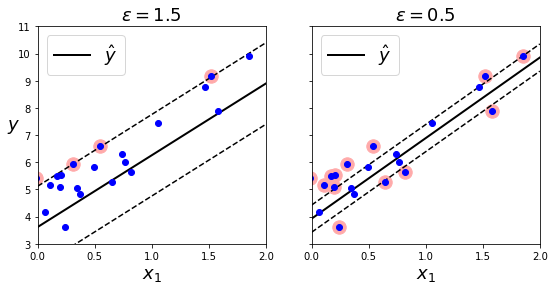

In [69]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg_1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg_1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

plt.sca(axes[1])
plot_svm_regression(svm_reg_2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg_2.epsilon), fontsize=18)
plt.show()

#### Nonlinear SVR

In [70]:
# generate 2nd-order samples
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [71]:
# fit with polynomial kernel SVR
from sklearn.svm import SVR

svm_poly_reg_1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg_2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)

svm_poly_reg_1.fit(X, y)
svm_poly_reg_2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

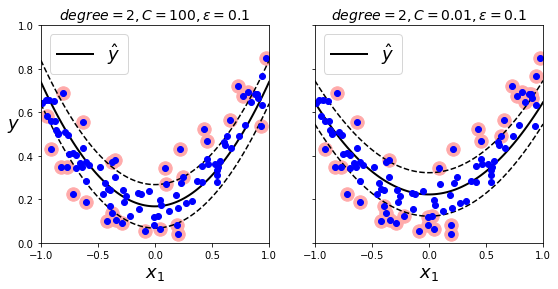

In [73]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg_1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg_1.degree, svm_poly_reg_1.C, svm_poly_reg_1.epsilon), fontsize=14)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg_2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg_2.degree, svm_poly_reg_2.C, svm_poly_reg_2.epsilon), fontsize=14)
plt.show()